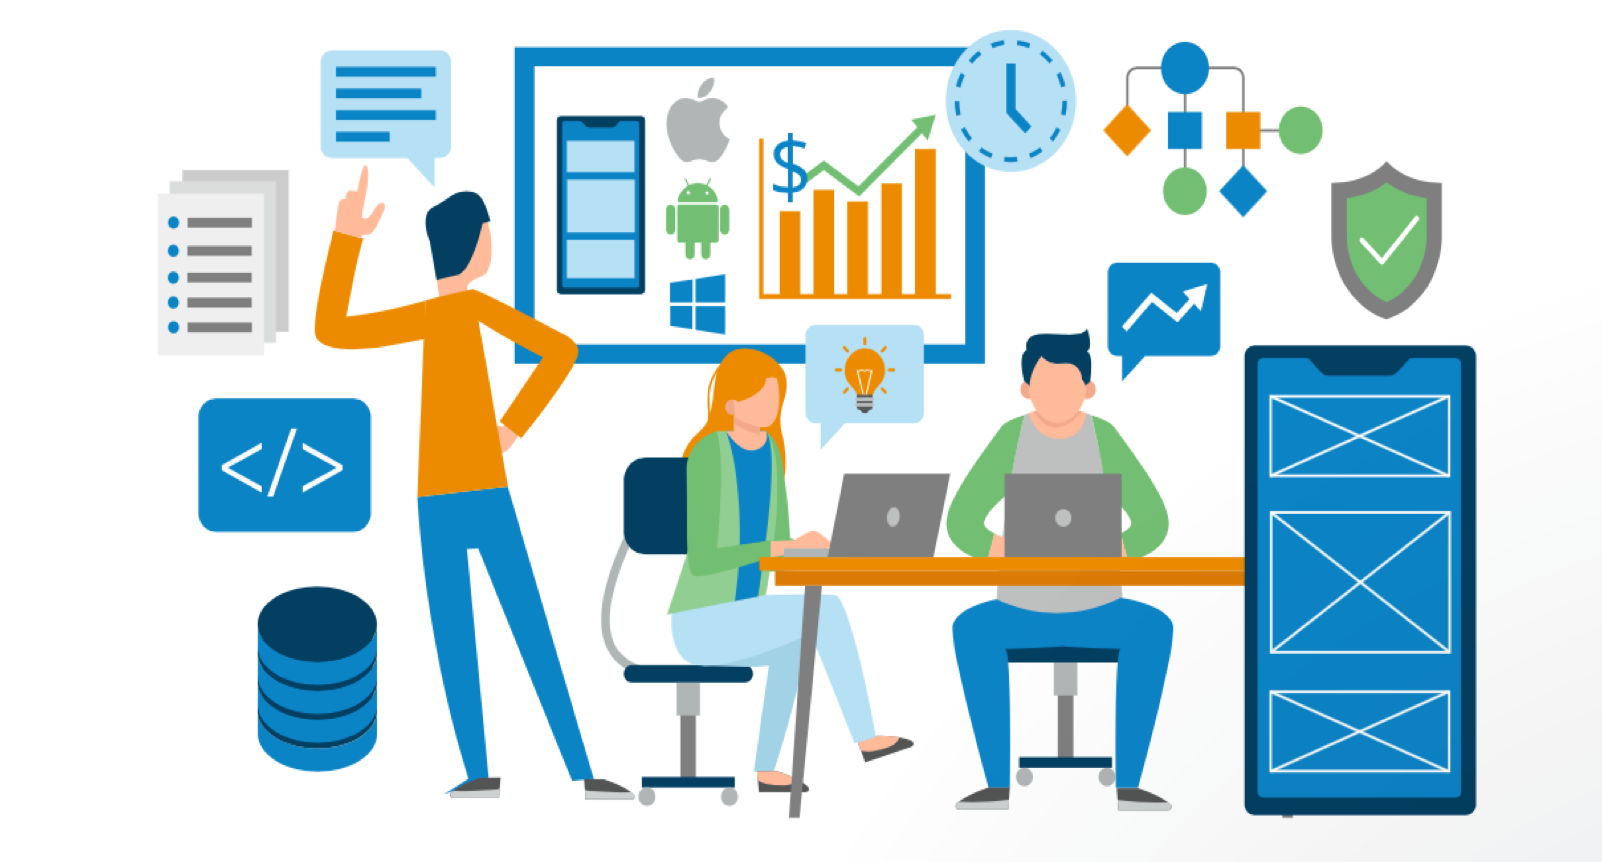

pic credit - google images

# Dataset Acknowledgement



Amidst the pandemic many people lost their jobs, with this dataset it is possible to hone the job search so that more people in need can find employment.This dataset was created by picklesueat and contains more than 2000 job listing for data analyst positions, with features such as:

* Salary Estimate
* Location
* Company Rating
* Job Description
* and more.



# We will Perform EDA on following questions


* What is Min and Max Salary Distribution of Data Analyst
* Which type of Industry have High Revenue
* Which type of sector have best Salary and Rating
* Which type of Sector have Good Average Rating
* Which Sector have Highest Average Revenue
* Which location(city) have highest Data Analyst or does it's play any important role in Job
* For which Job Role People mostly apply
* For which Stream(Domain) People mostly apply
* For which Industry People mostly apply
* Which Sector is leading in Data Analyst
* Which Company have most Data Analyst
* Which type of OwnerShip do company have
* Which city have highest Data Analyst

# Importing Libraries and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly.graph_objs as go
import plotly.express as px
import re

from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

In [2]:
data = pd.read_csv('../input/data-analyst-jobs/DataAnalyst.csv')
data.drop("Unnamed: 0",1,inplace = True)

In [3]:
data.shape

(2253, 15)

**Reading Top Ten Data from dataset**

In [4]:
data.head(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
5,Data Analyst,$37K-$66K (Glassdoor est.),About Cubist\nCubist Systematic Strategies is ...,3.9,Point72\n3.9,"New York, NY","Stamford, CT",1001 to 5000 employees,2014,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
6,Business/Data Analyst (FP&A),$37K-$66K (Glassdoor est.),Two Sigma is a different kind of investment ma...,4.4,Two Sigma\n4.4,"New York, NY","New York, NY",1001 to 5000 employees,2001,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
7,Data Science Analyst,$37K-$66K (Glassdoor est.),Data Science Analyst\n\nJob Details\nLevel\nEx...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True
8,Data Analyst,$37K-$66K (Glassdoor est.),The Data Analyst is an integral member of the ...,4.0,DMGT\n4.0,"New York, NY","London, United Kingdom",5001 to 10000 employees,1896,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),"Thomson Reuters, Hearst, Pearson",-1
9,"Data Analyst, Merchant Health",$37K-$66K (Glassdoor est.),About Us\n\nRiskified is the AI platform power...,4.4,Riskified\n4.4,"New York, NY","New York, NY",501 to 1000 employees,2013,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,"Signifyd, Forter",-1


**Reading Last Ten Data from dataset**

In [5]:
data.tail(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
2243,Data Analyst-(Remote- All across,$78K-$104K (Glassdoor est.),About CenturyLink\n\nCenturyLink (NYSE: CTL) i...,3.0,CenturyLink\n3.0,"Broomfield, CO","Monroe, LA",10000+ employees,1930,Company - Public,"Cable, Internet & Telephone Providers",Telecommunications,$10+ billion (USD),"AT&T, Verizon",-1
2244,"Data Security Analyst, Sr",$78K-$104K (Glassdoor est.),Contract Duration: 9 Months\n\nLocation: Denve...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2245,Data Analyst Supporting the DEA #20-242,$78K-$104K (Glassdoor est.),Salary:\nPublished Job Title:\nData Analyst Su...,2.8,Forfeiture Support Associates\n2.8,"Centennial, CO","Ashburn, VA",1001 to 5000 employees,2004,Company - Private,Staffing & Outsourcing,Business Services,$50 to $100 million (USD),-1,-1
2246,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),Spiceorb is looking for Technical Business Ana...,-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2247,Marketing/Communications - Data Analyst-Marketing,$78K-$104K (Glassdoor est.),Job Description\nJob Title: Marketing/Communic...,4.1,APN Software Services Inc.\n4.1,"Broomfield, CO","Newark, CA",51 to 200 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD),-1,-1
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1
2252,Senior Quality Data Analyst,$78K-$104K (Glassdoor est.),"You.\n\nYou bring your body, mind, heart and s...",3.4,SCL Health\n3.4,"Broomfield, CO","Broomfield, CO",10000+ employees,1864,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Centura Health, HealthONE, Denver Health and H...",-1


Checking Datatype and Not Null Values in Dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   object 
 10  Industry           2253 non-null   object 
 11  Sector             2253 non-null   object 
 12  Revenue            2253 non-null   object 
 13  Competitors        2253 non-null   object 
 14  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 264.1+ KB


# DATA CLEANSING

> Info method shows that there are no null value but if we observe the dataset heading and tail we will come to know that instead of null value they have put -1 

**so lets do one thing we will replace -1 with np.nan so we can calculate the missing values in dataset for better observation**

In [7]:
data.replace(to_replace =-1 , value=np.nan,inplace=True)
data.replace(to_replace ='-1' , value=np.nan,inplace=True)
data.replace(to_replace =-1.0 , value=np.nan,inplace=True)

In [8]:
def FindingMissingValues(dataFrame):
    for col in dataFrame.columns:
        print('{0:.2f}% or {1} values are Missing in {2} Column'.format(dataFrame[col].isna().sum()/len(dataFrame)*100,dataFrame[col].isna().sum(),col),end='\n\n')

FindingMissingValues(data)

0.00% or 0 values are Missing in Job Title Column

0.04% or 1 values are Missing in Salary Estimate Column

0.00% or 0 values are Missing in Job Description Column

12.07% or 272 values are Missing in Rating Column

0.04% or 1 values are Missing in Company Name Column

0.00% or 0 values are Missing in Location Column

7.63% or 172 values are Missing in Headquarters Column

7.23% or 163 values are Missing in Size Column

29.29% or 660 values are Missing in Founded Column

7.23% or 163 values are Missing in Type of ownership Column

15.67% or 353 values are Missing in Industry Column

15.67% or 353 values are Missing in Sector Column

7.23% or 163 values are Missing in Revenue Column

76.88% or 1732 values are Missing in Competitors Column

96.45% or 2173 values are Missing in Easy Apply Column



**96.45% or 2173 values are Missing in Easy Apply Column** 

**76.88% or 1732 values are Missing in Competitors Column**

There are more than 50% values are missing in these 2 Column 

so we will simply drop the Column becaue there are not enough data to do Forward,Backward, Mean, Median , Mode or Imputer Fill

In [9]:
data.drop(['Easy Apply','Competitors'],1,inplace = True)

In Job Title Column We can point one thing that **Job Role** is been define before "," and **Domain** or **Branch** for Job is Define after ","

So we simply split these in two different columns namely **Job Domain** and **Job Role**

In [10]:
data['Job Domain'] = data['Job Title'].apply(lambda x: re.search(r',.*',x).group().replace(',','') if(bool(re.search(r',.*',x))) else x )
data['Job Role'] = data['Job Title'].apply(lambda x: re.search(r'.*,',x).group().replace(',','') if(bool(re.search(r',.*',x))) else x )

Salary Estimate have salary range **Min to Max**

we will divide this column into two columns one will be  ***Min Salary*** and another will be ***Max Salary***
and also convert the data type from object to  into float64

where K = 1000Dollors   (for this dataset $) so we will simply mutiply 1000 where salary is listed with "K" for simple Calculation


In [11]:

data['Min Salary'] = 0
data['Max Salary'] = 0

for x in range(len(data)):
    
    if(type(data.iloc[x,1])==float):
        data.iloc[x,15] = np.nan
        data.iloc[x,16] = np.nan
    else:
        cleanSal = data.iloc[x,1].replace('(Glassdoor est.)','').strip().split('-')
    
    if('K' in cleanSal[0]):
        data.iloc[x,15] = float(cleanSal[0].replace('$','').replace('K',''))*1000
    
        
    if('K' in cleanSal[1]):
        data.iloc[x,16]= float(cleanSal[1].replace('$','').replace('K',''))*1000
    

Job Description Column have huge amount of text data which is not required for this EDA so we will drop this column ***(But we will use this in next Version)***

And we also know that If a Person is Appointed as Data Analyst or for any Job Role then he or she must have great idea about that role 

In [12]:
data.drop('Job Description',1,inplace=True)

In Company Column we can see that data have ***\n3.8*** as suffix where 3.8 is rating of company and we will eliminate this and only keep the Company name in that column because we already have a seprate Rating Column

In [13]:
data['Company Name'] = data['Company Name'].apply(lambda x: re.sub(r'\n.*','',str(x)))

In Employees Column

It show the range of employe, so we will only keep max number of emp for better EDA in  new column MaxEmpSize

In [14]:

data['MaxEmpSize'] = 0

for x in range(len(data)):
    emp = data.iloc[x,6]
    
    try:
        if(type(emp)==float or emp == 'Unknown'): #type(np.nan)== float
            data.iloc[x,16] =  np.nan
        elif('+' in emp):
            data.iloc[x,16] = float(emp.replace('+','').replace('employees','').strip())
        elif('employees' in emp):
            data.iloc[x,16] = float(emp.replace('employees','').strip().split('to')[1])
    except(Exception)as e:
        print(e,emp)


In Revenue Col it's provide revenue in range and also in two different Unit Millions and Billions

Where if 500M we will replace it as  500000000 and for 5 Billion 5000000000

and also we will take only the max Revenue in Max Revenue Col


In [15]:

data['MaxRevenue'] = 0

for x in range(len(data)):
    rev = data.iloc[x,11]
    
    if(rev == 'Unknown / Non-Applicable' or type(rev)==float):
        data.iloc[x,17] = np.nan
    elif(('million' in rev) and ('billion' not in rev)):
        maxRev = rev.replace('(USD)','').replace("million",'').replace('$','').strip().split('to')
        if('Less than' in maxRev[0]):
            data.iloc[x,17] = float(maxRev[0].replace('Less than','').strip())*100000000
        else:
            if(len(maxRev)==2):
                data.iloc[x,17] = float(maxRev[1])*100000000
            elif(len(maxRev)<2):
                data.iloc[x,17] = float(maxRev[0])*100000000
    elif(('billion'in rev)):
        maxRev = rev.replace('(USD)','').replace("billion",'').replace('$','').strip().split('to')
        if('+' in maxRev[0]):
            data.iloc[x,17] = float(maxRev[0].replace('+','').strip())*1000000000
        else:
            if(len(maxRev)==2):
                data.iloc[x,17] = float(maxRev[1])*1000000000
            elif(len(maxRev)<2):
                data.iloc[x,17] = float(maxRev[0])*1000000000
        

We have Successfully cleaned the data now we can remove some column 

* Job Title
* Salary Estimate
* Size
* Revenue

because we have successfully extracted usefull data

In [16]:
data.drop(['Job Title','Salary Estimate','Size','Revenue'],1,inplace = True)
data.head(10)

,Rating,Company Name,Location,Headquarters,Founded,Type of ownership,Industry,Sector,Job Domain,Job Role,Min Salary,Max Salary,MaxEmpSize,MaxRevenue
0,3.2,Vera Institute of Justice,"New York, NY","New York, NY",1961.0,Nonprofit Organization,Social Assistance,Non-Profit,Center on Immigration and Justice (CIJ),Data Analyst,37000.0,66000.0,500.0,5.000000e+10
1,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,Quality Data Analyst,Quality Data Analyst,37000.0,66000.0,10000.0,5.000000e+09
2,3.4,Squarespace,"New York, NY","New York, NY",2003.0,Company - Private,Internet,Information Technology,Insights & Analytics Team [Customer Operations],Senior Data Analyst,37000.0,66000.0,5000.0,NaN
3,4.1,Celerity,"New York, NY","McLean, VA",2002.0,Subsidiary or Business Segment,IT Services,Information Technology,Data Analyst,Data Analyst,37000.0,66000.0,500.0,1.000000e+10
4,3.9,FanDuel,"New York, NY","New York, NY",2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",Reporting Data Analyst,Reporting Data Analyst,37000.0,66000.0,1000.0,5.000000e+10
5,3.9,Point72,"New York, NY","Stamford, CT",2014.0,Company - Private,Investment Banking & Asset Management,Finance,Data Analyst,Data Analyst,37000.0,66000.0,5000.0,NaN
6,4.4,Two Sigma,"New York, NY","New York, NY",2001.0,Company - Private,Investment Banking & Asset Management,Finance,Business/Data Analyst (FP&A),Business/Data Analyst (FP&A),37000.0,66000.0,5000.0,NaN
7,3.7,GNY Insurance Companies,"New York, NY","New York, NY",1914.0,Company - Private,Insurance Carriers,Insurance,Data Science Analyst,Data Science Analyst,37000.0,66000.0,500.0,5.000000e+10
8,4.0,DMGT,"New York, NY","London, United Kingdom",1896.0,Company - Public,Venture Capital & Private Equity,Finance,Data Analyst,Data Analyst,37000.0,66000.0,10000.0,2.000000e+09
9,4.4,Riskified,"New York, NY","New York, NY",2013.0,Company - Private,Research & Development,Business Services,Merchant Health,Data Analyst,37000.0,66000.0,1000.0,NaN


# Visualization Part

In [17]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,1981.0,3.731903e+00,6.703322e-01,1.0,3.300000e+00,3.700000e+00,4.100000e+00,5.000000e+00
Founded,1593.0,1.978363e+03,4.782229e+01,1682.0,1.970000e+03,1.997000e+03,2.006000e+03,2.019000e+03
Min Salary,2253.0,5.426720e+04,1.957103e+04,24000.0,4.100000e+04,5.000000e+04,6.400000e+04,1.130000e+05
Max Salary,2253.0,8.998402e+04,2.931002e+04,38000.0,7.000000e+04,8.700000e+04,1.040000e+05,1.900000e+05
MaxEmpSize,2048.0,3.367700e+03,4.012910e+03,50.0,2.000000e+02,1.000000e+03,5.000000e+03,1.000000e+04
MaxRevenue,1475.0,1.169817e+10,1.636752e+10,100000000.0,2.000000e+09,5.000000e+09,1.000000e+10,5.000000e+10


In [18]:
data.describe(include='object').transpose()

,count,unique,top,freq
Company Name,2253,1502,"Staffigo Technical Services, LLC",58
Location,2253,253,"New York, NY",310
Headquarters,2081,482,"New York, NY",206
Type of ownership,2090,14,Company - Private,1273
Industry,1900,88,IT Services,325
Sector,1900,24,Information Technology,570
Job Domain,2253,1251,Data Analyst,405
Job Role,2253,1173,Data Analyst,443


# What is Min and Max Salary Distribution of Data Analyst


In [19]:
dataAnalyst = data[data['Job Role']=='Data Analyst']

fig = go.Figure()

fig.add_trace(go.Box(y=dataAnalyst['Min Salary'],name='Min Salary',boxmean='sd'))
fig.add_trace(go.Box(y=dataAnalyst['Max Salary'],name='Max Salary',boxmean='sd'))

fig.update_layout(title='Minimum and Maximum Salary of Data Analyst',height=800)

fig.show()

# Which type of Industry have high Revenue 

In [20]:
industry = data.groupby(['Industry'])['MaxRevenue'].mean()
fig = go.Figure()

fig.add_trace(go.Scatter(x=industry.index,y=industry,mode='lines+markers',marker = dict(color = 'rgba(255,0, 0, 1.0)',size=12)))

fig.show()

**Industry Type Which have Mean Revenue Greater than 20Billion**

In [21]:
industry = industry[industry>20000000000]

fig = go.Figure()

fig.add_trace(go.Scatter(x=industry.index,y=industry,mode='lines+markers',marker=dict(color='rgba(255,0,0,1.0)',size=12)))

fig.update_layout(title='Industry Type Which have Mean Revenue Greater than 20Billion',
                 yaxis=dict(title='Billion Dollars'),
                  xaxis=dict(title='Industry Type')
                 )

fig.show()

# Which type of sector have best Salary and Rating

In [22]:
sector = data.groupby(['Sector']).mean()

fig = go.Figure()

fig.add_trace(go.Bar(x=sector.index,y=sector['Min Salary'],name='Mininum Mean Salary',text=sector['Min Salary'],textposition='auto' ))
fig.add_trace(go.Bar(x=sector.index,y=sector['Max Salary'],name='Maximum Mean Salary',text=sector['Min Salary'],textposition='auto'))

fig.update_layout(title='Mean Salary',barmode='stack')

fig.show()

# Which type of Sector have Good Average Rating

In [23]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=sector.index,y=sector['Rating'],name='Rating',text=sector['Rating'],
                         mode='markers',
                         marker=dict(size=sector['Rating']*8,color=sector['Rating'])
                        ))

fig.update_layout(title='Sectors with Average Rating',
                 xaxis=dict(title='Sectors'),
                 yaxis=dict(title='Average Rating'))

fig.show()

# Which Sector have Highest Average Revenue

In [24]:
fig = go.Figure()

sector.dropna(inplace=True)
fig.add_trace(go.Scatter(x=sector.index,y=sector['MaxRevenue'],name='MaxRevenue',text=sector['Rating'],
                         mode='markers',
                         marker=dict(size=sector['MaxRevenue']**0.15,color=sector['MaxRevenue'])
                        ))

fig.update_layout(title='Sector with Average Revenue',
                 xaxis=dict(title='Sectors'),
                 yaxis=dict(title='Average MaxRevenue'))

fig.show()

# Which location(city) have highest Data Analyst or does it's play any important role in Job 

In [25]:
data2 = data.dropna()
fig = px.sunburst(data2, path=['Sector','Location','Job Role'], values='Min Salary',height=800)
fig.update_layout(title='Sector -> Location -> JobRole -> Min Salary')
fig.show()

# For which Job Role People mostly apply

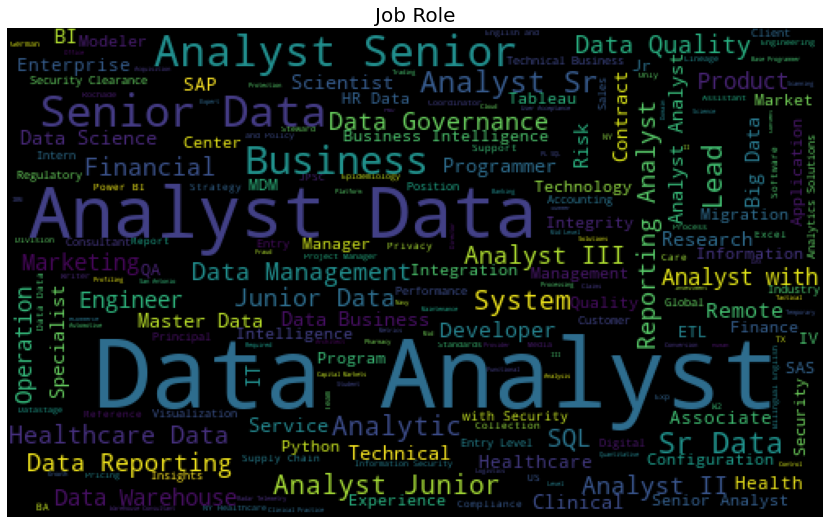

In [26]:
from wordcloud import WordCloud

def WordCloudMaking(data,col):
    invester = data[col][~pd.isnull(data[col])]

    wordCloud = WordCloud(width=500,height= 300).generate(' '.join(invester))

    plt.figure(figsize=(19,9))

    plt.axis('off')
    plt.title(data[col].name,fontsize=20)
    plt.imshow(wordCloud)
    plt.show()
WordCloudMaking(data,'Job Role')

# For which Stream(Domain) People mostly apply

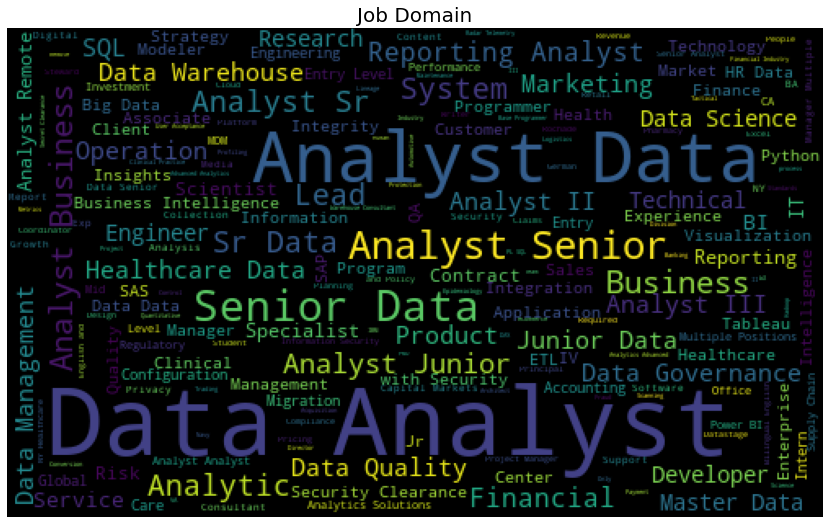

In [27]:
WordCloudMaking(data,'Job Domain')

# For which Industry People mostly apply

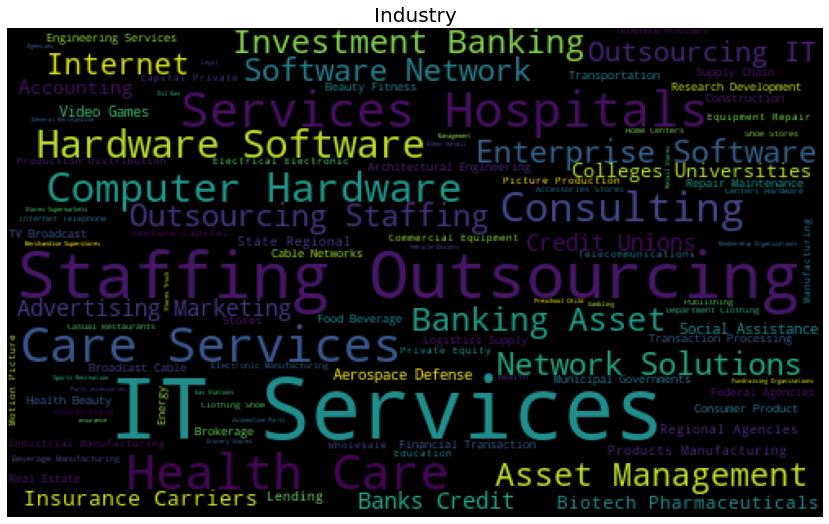

In [28]:
WordCloudMaking(data,'Industry')

# Which Sector is leading in Data Analyst

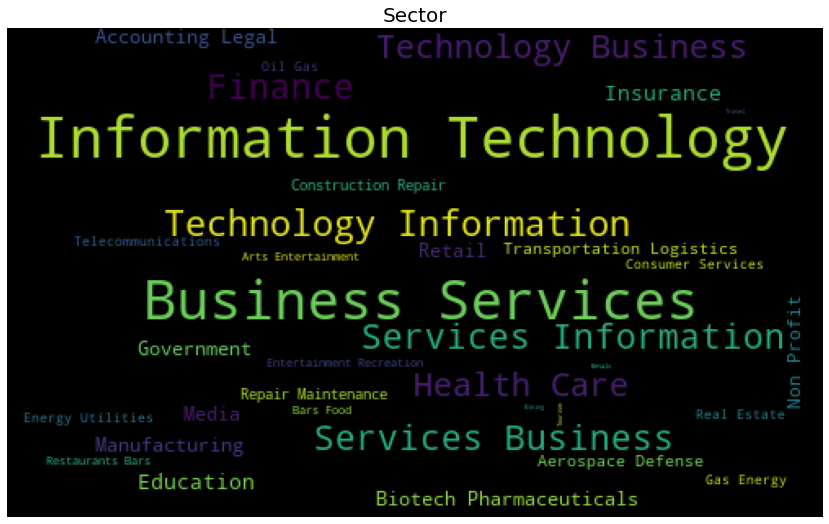

In [29]:
WordCloudMaking(data,'Sector')

# Which Company have most Data Analyst

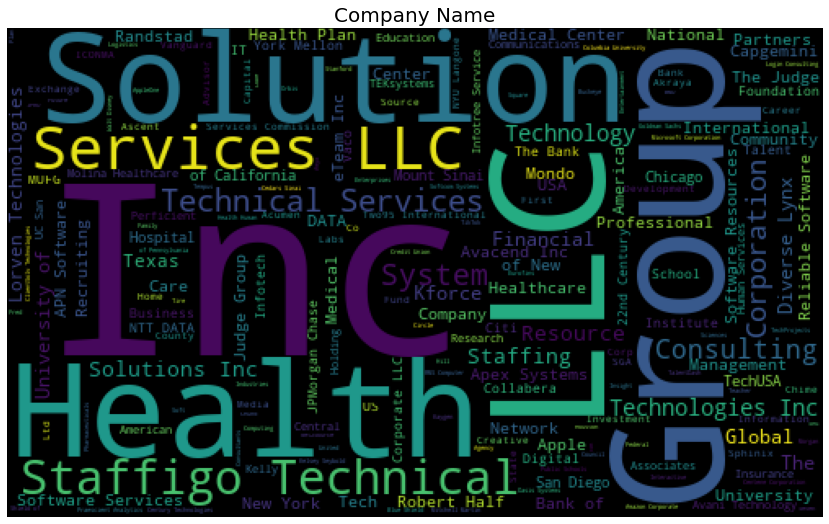

In [30]:
WordCloudMaking(data,'Company Name')

# Which type of OwnerShip do company have

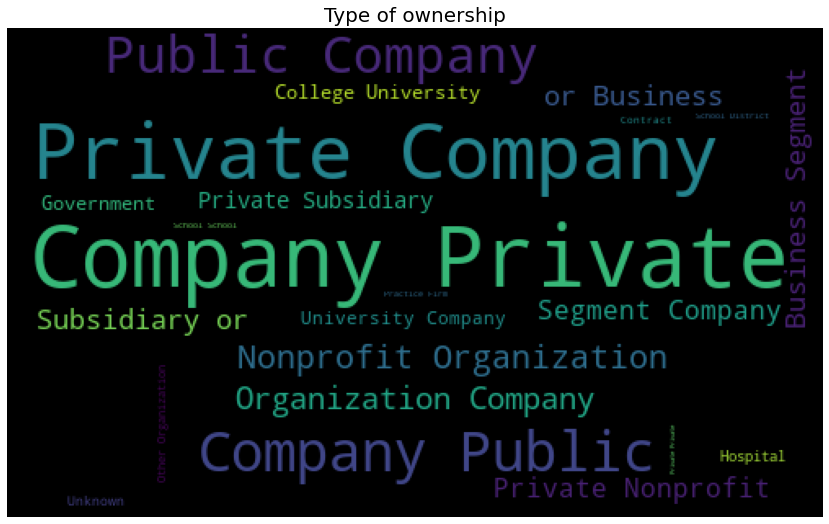

In [31]:
WordCloudMaking(data,'Type of ownership')

# Which city have highest Data Analyst

In [32]:
location = data[data['Job Role']=='Data Analyst']['Location'].value_counts()
fig = px.pie(location,names=location.index,values=location,height=800)
fig.update_traces(textposition='inside',textinfo='label+percent',hole=.4)

fig.update_layout(annotations=[dict(text='Locations with Maximum Data Analyst',showarrow=False)])

fig.show()

**If you guys have any suggestion(s) please comment down below it will help me to improve my skill**